## from https://web.stanford.edu/~boyd/papers/admm/

# Code

In [1]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/linprog/linprog.html")


code =

    'function [z, history] = linprog(c, A, b, rho, alpha)
     % linprog  Solve standard form LP via ADMM
     %
     % [x, history] = linprog(c, A, b, rho, alpha);
     % 
     % Solves the following problem via ADMM:
     % 
     %   minimize     c'*x
     %   subject to   Ax = b, x >= 0
     % 
     % The solution is returned in the vector x.
     %
     % history is a structure that contains the objective value, the primal and 
     % dual residual norms, and the tolerances for the primal and dual residual 
     % norms at each iteration.
     % 
     % rho is the augmented Lagrangian parameter. 
     %
     % alpha is the over-relaxation parameter (typical values for alpha are 
     % between 1.0 and 1.8).
     %
     %
     % More information can be found in the paper linked at:
     % http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
     %
     
     t_start = tic;
     
     %% Global constants and defaults
     
     QUIET    = 0;
     MAX_ITER =

In [2]:
%%file linprog.m

function [z, history] = linprog(c, A, b, rho, alpha)
% linprog  Solve standard form LP via ADMM
%
% [x, history] = linprog(c, A, b, rho, alpha);
%
% Solves the following problem via ADMM:
%
%   minimize     c'*x
%   subject to   Ax = b, x >= 0
%
% The solution is returned in the vector x.
%
% history is a structure that contains the objective value, the primal and
% dual residual norms, and the tolerances for the primal and dual residual
% norms at each iteration.
%
% rho is the augmented Lagrangian parameter.
%
% alpha is the over-relaxation parameter (typical values for alpha are
% between 1.0 and 1.8).
%
%
% More information can be found in the paper linked at:
% http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
%

t_start = tic;

%% Global constants and defaults

QUIET    = 0;
MAX_ITER = 1000;
ABSTOL   = 1e-4;
RELTOL   = 1e-2;

%% Data preprocessing

[m n] = size(A);

%% ADMM solver

x = zeros(n,1);
z = zeros(n,1);
u = zeros(n,1);

if ~QUIET
    fprintf('%3s\t%10s\t%10s\t%10s\t%10s\t%10s\n', 'iter', ...
      'r norm', 'eps pri', 's norm', 'eps dual', 'objective');
end

for k = 1:MAX_ITER

    % x-update
    tmp = [ rho*eye(n), A'; A, zeros(m) ] \ [ rho*(z - u) - c; b ];
    x = tmp(1:n);

    % z-update with relaxation
    zold = z;
    x_hat = alpha*x + (1 - alpha)*zold;
    z = pos(x_hat + u);

    u = u + (x_hat - z);

    % diagnostics, reporting, termination checks

    history.objval(k)  = objective(c, x);

    history.r_norm(k)  = norm(x - z);
    history.s_norm(k)  = norm(-rho*(z - zold));

    history.eps_pri(k) = sqrt(n)*ABSTOL + RELTOL*max(norm(x), norm(-z));
    history.eps_dual(k)= sqrt(n)*ABSTOL + RELTOL*norm(rho*u);

    if ~QUIET
        fprintf('%3d\t%10.4f\t%10.4f\t%10.4f\t%10.4f\t%10.2f\n', k, ...
            history.r_norm(k), history.eps_pri(k), ...
            history.s_norm(k), history.eps_dual(k), history.objval(k));
    end

    if (history.r_norm(k) < history.eps_pri(k) && ...
       history.s_norm(k) < history.eps_dual(k))
         break;
    end
end

if ~QUIET
    toc(t_start);
end
end

function obj = objective(c, x)
    obj = c'*x;
end

Created file '/home/wenh06/Jupyter/wenhao/workspace/fl_seminar/code/boyd-admm/linprog.m'.


# Example

In [3]:
eg_code = grabcode("https://web.stanford.edu/~boyd/papers/admm/linprog/linprog_example.html")


eg_code =

    '% Standard form LP with random data
     
     %% Generate problem data
     randn('state', 0);
     rand('state', 0);
     
     n = 500;  % dimension of x
     m = 400;  % number of equality constraints
     
     c  = rand(n,1) + 0.5;    % create nonnegative price vector with mean 1
     x0 = abs(randn(n,1));    % create random solution vector
     
     A = abs(randn(m,n));     % create random, nonnegative matrix A
     b = A*x0;
     
     %% Solve problem
     
     [x history] = linprog(c, A, b, 1.0, 1.0);
     
     %% Reporting
     K = length(history.objval);                                                                                                        
     
     h = figure;
     plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2); 
     ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');
     
     g = figure;
     subplot(2,1,1);                                                                                                                 

### Generate problem data

In [4]:
randn('state', 0);
rand('state', 0);

n = 500;  % dimension of x
m = 400;  % number of equality constraints

c  = rand(n,1) + 0.5;    % create nonnegative price vector with mean 1
x0 = abs(randn(n,1));    % create random solution vector

A = abs(randn(m,n));     % create random, nonnegative matrix A
b = A*x0;

### Solve problem

In [5]:
[x history] = linprog(c, A, b, 1.0, 1.0);

iter	    r norm	   eps pri	    s norm	  eps dual	 objective
  1	    1.0583	    0.2090	   20.6468	    0.0128	    377.17
  2	    1.3281	    0.2132	    2.2600	    0.0253	    371.25
  3	    1.5087	    0.2182	    1.9352	    0.0387	    367.10
  4	    1.5695	    0.2229	    1.6421	    0.0518	    364.81
  5	    1.5312	    0.2262	    1.4066	    0.0635	    364.21
  6	    1.4058	    0.2280	    1.2723	    0.0733	    364.81
  7	    1.2277	    0.2286	    1.2189	    0.0807	    365.98
  8	    1.0224	    0.2286	    1.2002	    0.0859	    367.35
  9	    0.8861	    0.2282	    1.1314	    0.0887	    368.77
 10	    0.8534	    0.2278	    1.0007	    0.0896	    370.05
 11	    0.8526	    0.2275	    0.8478	    0.0893	    371.04
 12	    0.7885	    0.2272	    0.7667	    0.0884	    371.69
 13	    0.7181	    0.2271	    0.6922	    0.0872	    372.04
 14	    0.6492	    0.2272	    0.6628	    0.0859	    372.10
 15	    0.5849	    0.2274	    0.6356	    0.0848	    371.97
 16	    0.5359	    0.2276	    0.5851	    0.0839	    371

### Reporting

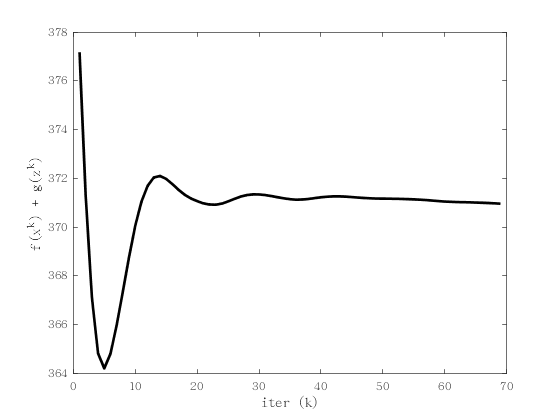

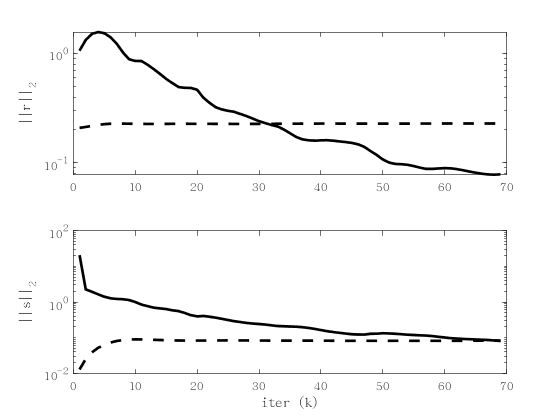

In [6]:
K = length(history.objval);

h = figure;
plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2);
ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');

g = figure;
subplot(2,1,1);
semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
    1:K, history.eps_pri, 'k--',  'LineWidth', 2);
ylabel('||r||_2');

subplot(2,1,2);
semilogy(1:K, max(1e-8, history.s_norm), 'k', ...
    1:K, history.eps_dual, 'k--', 'LineWidth', 2);
ylabel('||s||_2'); xlabel('iter (k)');